#Student Name: Cathal Cronin
#Student ID: 10131531

### Problem Statement:

- A box is filled with 21 balls. 
- There are 3 different coloured balls:
    - 7 White
    - 7 Blue
    - 7 Green
----

- ### Picking 6 balls at random, what is the probability that you pick 3 White balls.

[Followed the following tutorial and took an adapted example](http://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb) 

`Experiment`: An occurrence with an uncertain outcome that we can observe. 

- Picking 6 balls at random, what is the probability that you pick 3 White balls.

`Outcome`: The result of an experiment; one particular state of the world. 

- An outcome is a set of 6 balls

`Sample Space`: The set of all possible outcomes for the experiment. 

- The sample space is the set of all possible 6 ball combinations

`Event`: A subset of possible outcomes that together have some property we are interested in. 
- Number of draws that contain 3 white balls

`Probability`: The probability of an event occuring with regard to the sample size.
- Number of draws that have 3 white balls divided by the total number of possible draws.

In [1]:
import itertools
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def gen_set(colour, num_balls):
    """Generate box of balls"""
    return {col + str(ball_id) for col in colour  for ball_id in range(1, num_balls + 1)}

box = gen_set('W', 7) | gen_set('B', 7) | gen_set('G', 7) 

box

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7'}

In [3]:
len(box)

21

In [100]:
# These are convience methods 
def find_prop_of_event(event, space): 
    "The probability of an event, given a sample space of all outcomes."
    return len(event & space) / len(space)

def combos(items, n):
    "Create a box of all possible combinations of draws."
    return {' '.join(combo) for combo in itertools.combinations(items, n)}

sample_space = combos(box, 6)

len(sample_space)

54264

In [101]:
# Snippet of our sample space.
random.sample(sample_space, 10)

['B2 B5 B4 G6 G3 G1',
 'B7 B1 W2 W3 W6 W7',
 'B2 W4 B6 G5 G3 W1',
 'B2 W2 G7 W3 W1 W7',
 'W4 W3 W5 W1 G1 W7',
 'B2 B5 G4 G7 W5 G6',
 'G2 W2 G7 G3 W1 W7',
 'G2 B2 G4 B1 W2 W6',
 'B7 B1 B6 W2 B3 W6',
 'G2 B7 W4 W5 G6 W7']

### Question: Picking 6 balls at random, what is the probability that you pick 3 white balls?

In [102]:
white3 = {s for s in sample_space if s.count('W') == 3}
print(len(white3))

# Calculating the probability that we are going to draw 3 white balls.
# About 12740 combinations contain 3 white balls so this results at about 23% of the sample size.
# Below we will run a simulation of drawing and should get a number that is close to this.
P(white6, sample_space)

12740


0.2347781217750258

Number of white balls drawn on:
      Median: 2.0 
      Standard Deviation 0.9968946784891571
The percentage to draw 3 white balls 23.62


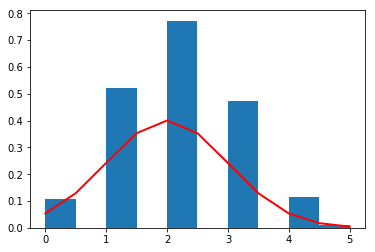

In [98]:
num_draws = 10000
num_white = 0
num_draws_with_3_white = 0
white_counts = []
sample_space = combos(box, 6)

for i in range(num_draws):
    ball_list = random.sample(sample_space, 1)
    white_count =  sum(1 for draw in ball_list for char in draw if char == 'W')
    num_white += white_count
    
    white_counts.append(white_count)
    if white_count == 3:
        num_draws_with_3_white += 1
         
standard_deviation = np.std(white_counts)
median_draws = np.median(white_counts)
draw_3_white_percentage = (num_draws_with_3_white / num_draws) * 100  


print("Number of white balls drawn on:\n\
      Median: {} \n\
      Standard Deviation {}".format(str(median_draws), str(standard_deviation)))

print("The percentage to draw 3 white balls {}".format(draw_3_white_percentage))

count, bins, _ = plt.hist(white_counts, density=True)
plt.plot(bins, 1 / (standard_deviation * np.sqrt(2 * np.pi)) * np.exp( - (bins - median_draws)**2 / (2 * standard_deviation**2) ),linewidth=2, color='r')

From the above we can see that on average we are drawing 2 white balls most of the time. After running the simulaiton of taking 50,000 draws of 6 balls each time. The average amount of time we are going to draw 3 white balls is ~23%. This approximation is what is expected as mentioned above. The histogram visualises the the normal distribution of our results for median and standard deviations.